Import neccessary libraries from python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Extract the data required, found in the NTSB database.

In [3]:
data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')

/Users/orangelmendez/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [14]:
data['Injury.Severity'].values

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', ..., 'Non-Fatal', nan, 'Minor'],
      dtype=object)

In [15]:
data['Injury.Severity'].isna().sum()

1000

In [43]:
data.dropna(subset=['Injury.Severity', 'Make'], inplace=True)

In [44]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  53707
Longitude                 53716
Airport.Code              37814
Airport.Name              35289
Injury.Severity               0
Aircraft.damage            2679
Aircraft.Category         56452
Registration.Number        1271
Make                          0
Model                        45
Amateur.Built               100
Number.of.Engines          5331
Engine.Type                6237
FAR.Description           56653
Schedule                  75684
Purpose.of.flight          5218
Air.carrier               71735
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12500
Total.Minor.Injuries      11922
Total.Uninjured            5901
Weather.Condition          3555
Broad.phase.of.flight     26130
Report.Status              5452
Publication.Date          13497
dtype: i

In [91]:
data['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88882        Minor
88883        Fatal
88884        Minor
88886    Non-Fatal
88888        Minor
Name: Injury.Severity, Length: 87843, dtype: object

I noticed that within the 'Injury.Severity' column that Fatal has a number of repeated inputs that have parantheses following the entry. To eliminate any confusion, I will proceed to replace all rows that have 'Fatal' under one category

In [209]:
#replacing the () for items within the injury severity column
data['Injury.Severity'].replace(regex='\((\d+)\)', value= '', inplace=True)

Once we clean the column up. I want to group the injury type by make of the aircraft. Assessing which models have had fatal, serious, minor, Non-Fatal

In [210]:
sum(data['Injury.Severity'] == 'Fatal')

17809

In [211]:
#groups the DataFrame data by the columns 'Make' and 'Injury.Severity' and calculates
#the size (count) of each group, resetting the index of the resulting DataFrame
# grouped again by 'Injury.Severity', and for each group, the maximum size is calculated.

injury_type = data.groupby(['Injury.Severity']).size().reset_index().groupby('Injury.Severity').max()

In [212]:
injury_type

,0
Injury.Severity,
Fatal,17809
Incident,2216
Minor,218
Non-Fatal,67332
Serious,173
Unavailable,95


In [213]:
injury_type.index

Index(['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious', 'Unavailable'], dtype='object', name='Injury.Severity')

In [214]:
injury_type.columns

Index([0], dtype='object')

We would like check and see the number of Fatal accidents vs Minor, Serious, Non-Fatal.

* Fatal -> Any injury resulting in death within 30 days of accidents

* Incident -> An occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

* Serious -> Serious injury means any injury which: (1) Requires hospitalization for more than 48 hours, commencing within 7 days from the date of the injury was received; (2) results in a fracture of any bone (except simple fractures of fingers, toes, or nose); (3) causes severe hemorrhages, nerve, muscle, or tendon damage; (4) involves any internal organ; or (5) involves second- or third-degree burns, or any burns affecting more than 5 percent of the body surface.

* Minor -> Not specified, although if an injury does not meet the criteria for another injury category

<function matplotlib.pyplot.show(close=None, block=None)>

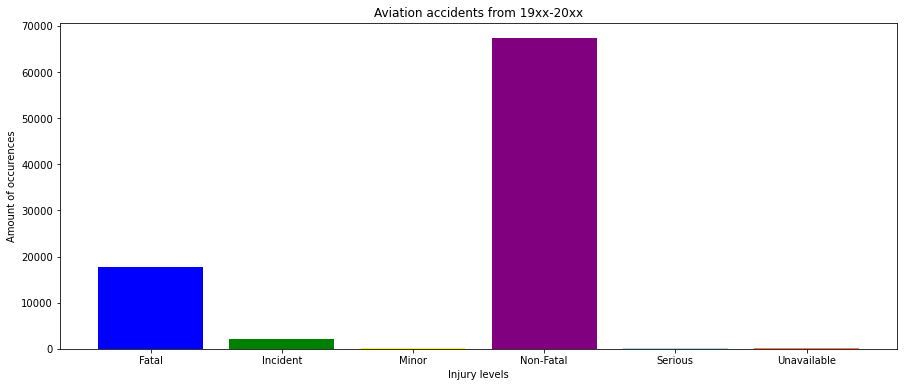

In [216]:
color = ['blue', 'green', 'yellow', 'purple', 'lightblue','coral']
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(injury_type.index, injury_type[0], color=color)
ax.set_xlabel('Injury levels')
ax.set_ylabel('Amount of occurences')
ax.set_title('Aviation accidents from 19xx-20xx')
plt.show

Checking the graph above. 

We can see that a large amount of accidents resulted in Non-Fatal injuries, and significant amount of aircrafts were considered to be 'Fatal'.

Let's examine which aircrafts had fatal accidents and which aircrafts had non-fatal accidents

We'll start by analyzing the Fatal first, and eliminate those aircrafts from contention.

In [218]:
len(data['Make'])

87843

In [226]:
data['Make'].tail(60).unique()

array(['CESSNA', 'BOEING', 'CIRRUS DESIGN CORP', 'EXTRA',
       'DANIEL ANTHONY PROCTOR', 'COSMOS', 'MOONEY', 'CHILDS MICHAEL  A',
       'PHANTOM', 'RUTAN', 'LEARJET INC', 'GREG HOBBS',
       'GATES LEAR JET CORP.', 'LEARJET', 'PIPER', 'STINSON',
       'AVIAT AIRCRAFT INC', 'ROTORSPORT UK LTD',
       'ENGINEERING & RESEARCH', 'BEECH', 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROCKWELL INTERNATIONAL', 'EUROCOPTER', 'HUGHES',
       'ARADO-FLUGZEUGWERKE GMBH', 'MOONEY AIRCRAFT CORP.',
       'AIRBUS HELICOPTERS', 'SWEARINGEN', 'ROYSE RALPH L',
       'GRUMMAN AMERICAN AVN. CORP.', 'AIR TRACTOR',
       'AMERICAN CHAMPION AIRCRAFT'], dtype=object)